# When /r/The_Donald disabled the downvoting button via CSS

Subreddit disabled comments on 2016-04-15, thread [here](https://www.reddit.com/r/The_Donald/comments/4euree/my_message_to_rall_now_that_downvoting_is_disabled/)

## Data processing

BigQuery:

```
SELECT author, num_comments, score, ups, downs, gilded, created_utc FROM [fh-bigquery:reddit_posts.2016_04] 
WHERE subreddit = 'The_Donald'
```
https://storage.cloud.google.com/staeiou_reddit/reddit_posts_the_donald_201604

In [1]:
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
posts_df = pd.DataFrame.from_csv("reddit_posts_the_donald_201604.csv")

In [3]:
posts_df[0:5]

,num_comments,score,ups,downs,gilded,created_utc
author,,,,,,
YaBoyyCuddle,0,13,13,0,0,1460422236
blkrctngl,2,14,14,0,0,1461198429
Monteg9210,1,23,23,0,0,1461198955
wookee8,10,1,1,0,0,1460248572
Voat_Donald_Trump,10,148,148,0,0,1459559899


In [4]:
posts_df['created'] = pd.to_datetime(posts_df.created_utc, unit='s')
posts_df['created_date'] = posts_df.created.dt.date

In [5]:
posts_df['downs'] = posts_df.score - posts_df.ups

In [6]:
posts_time_ups = posts_df.set_index('created_date').ups.sort_index()
posts_time_ups[0:5]

created_date
2016-04-01      0
2016-04-01      1
2016-04-01      5
2016-04-01    389
2016-04-01    304
Name: ups, dtype: int64

In [7]:
posts_date_df = posts_df.set_index('created').sort_index()

posts_date_df[0:5]

,num_comments,score,ups,downs,gilded,created_utc,created_date
created,,,,,,,
2016-04-01 00:00:08,45,240,240,0,0,1459468808,2016-04-01
2016-04-01 00:00:47,1,1,1,0,0,1459468847,2016-04-01
2016-04-01 00:00:59,0,22,22,0,0,1459468859,2016-04-01
2016-04-01 00:02:16,27,299,299,0,0,1459468936,2016-04-01
2016-04-01 00:02:56,9,118,118,0,0,1459468976,2016-04-01


In [8]:
posts_groupby = posts_date_df.groupby([pd.TimeGrouper('1D', closed='left')])

# Visualizations
## Daily average of number of comments per post

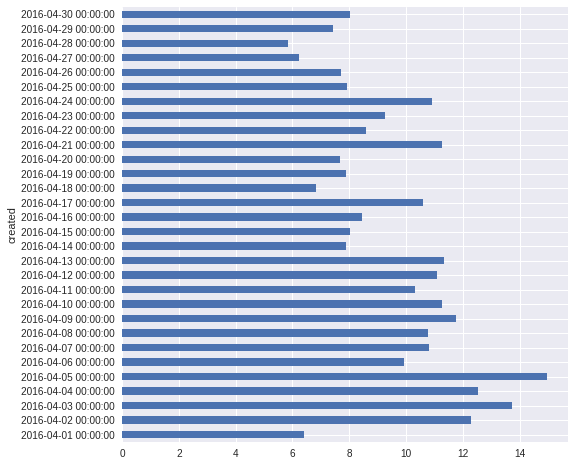

In [9]:
posts_groupby.mean().num_comments.plot(kind='barh', figsize=[8,8])

## Daily average of number of upvotes per post

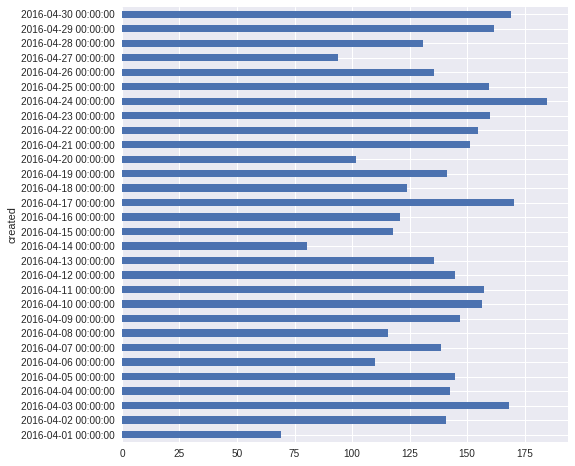

In [10]:
posts_groupby.mean().ups.plot(kind='barh', figsize=[8,8])